In [615]:
#https://www.narcis.nl/dataset/RecordID/oai%3Aeasy.dans.knaw.nl%3Aeasy-dataset%3A191591

In [616]:
import pandas as pd
import numpy as np
import dabl
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [617]:
df= pd.read_csv(".//RTA Dataset.csv")
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [619]:
df['Time'] = pd.to_datetime(df['Time'])

C:\Users\win10\anaconda3\lib\site-packages\dabl\plot\supervised.py:546: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."
C:\Users\win10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Target looks like classification
Showing only top 10 of 31 categorical features


C:\Users\win10\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\win10\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\win10\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\win10\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\win10\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\win10\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\win10\a

[[<Figure size 216x216 with 2 Axes>], None]

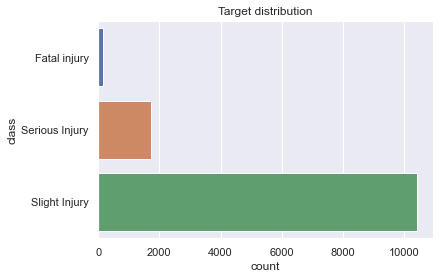

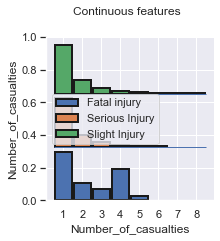

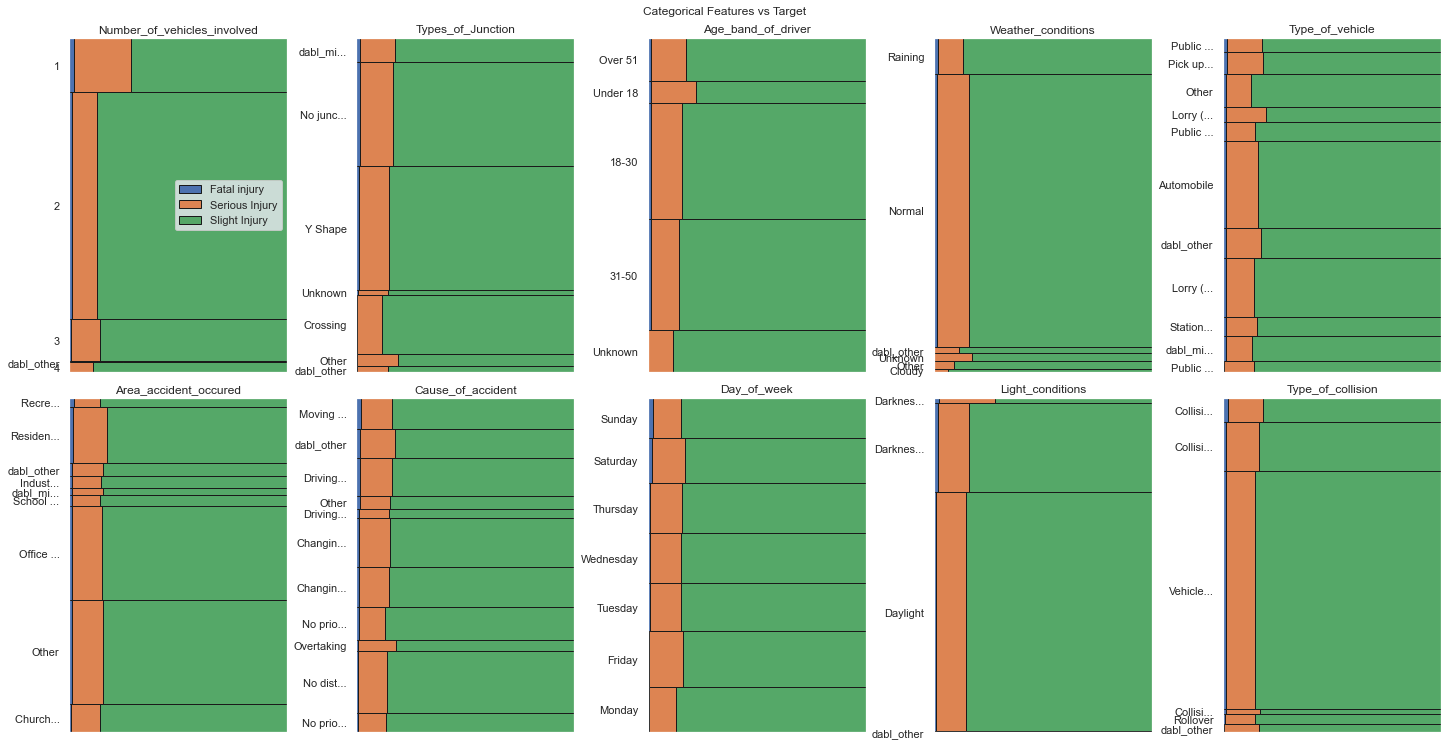

In [620]:
dabl.plot(df,'Accident_severity')

In [622]:
df.describe(include=['O']).T

,count,unique,top,freq
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883
Defect_of_vehicle,7889,3,No defect,7777


In [623]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [624]:
df.shape

(12316, 32)

In [625]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [626]:
# look at the summary to chek nan values
round(100*(df.isnull().sum()/len(df.index)), 2)

Time                            0.00
Day_of_week                     0.00
Age_band_of_driver              0.00
Sex_of_driver                   0.00
Educational_level               6.02
Vehicle_driver_relation         4.70
Driving_experience              6.73
Type_of_vehicle                 7.71
Owner_of_vehicle                3.91
Service_year_of_vehicle        31.89
Defect_of_vehicle              35.95
Area_accident_occured           1.94
Lanes_or_Medians                3.13
Road_allignment                 1.15
Types_of_Junction               7.20
Road_surface_type               1.40
Road_surface_conditions         0.00
Light_conditions                0.00
Weather_conditions              0.00
Type_of_collision               1.26
Number_of_vehicles_involved     0.00
Number_of_casualties            0.00
Vehicle_movement                2.50
Casualty_class                  0.00
Sex_of_casualty                 0.00
Age_band_of_casualty            0.00
Casualty_severity               0.00
W

<AxesSubplot:>

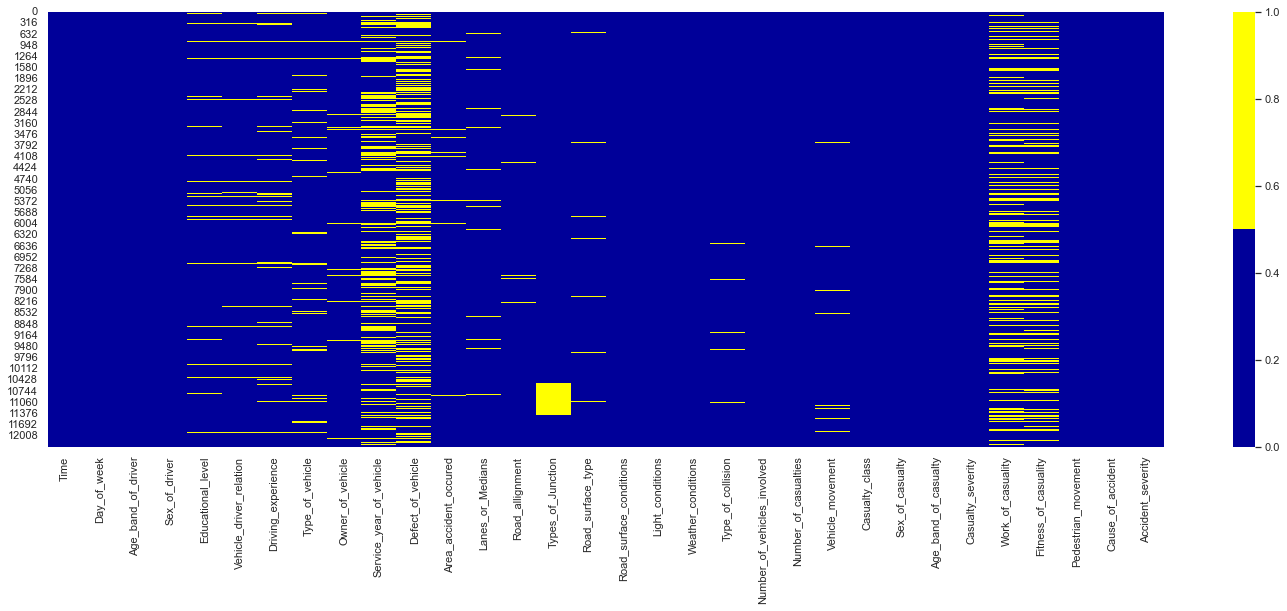

In [627]:
# check the missing data visually.colours - yellow is missing. blue is not missing.
sns.set(rc={'figure.figsize':(25,8)})

colours = ['#000099', '#ffff00'] 
sns.heatmap(df[:].isnull(), cmap=sns.color_palette(colours))

In [628]:
#cols_toremove = ['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality']
cols_toremove = ['Work_of_casuality', 'Fitness_of_casuality']

In [629]:
df_drop = df.drop(columns=cols_toremove)

<AxesSubplot:>

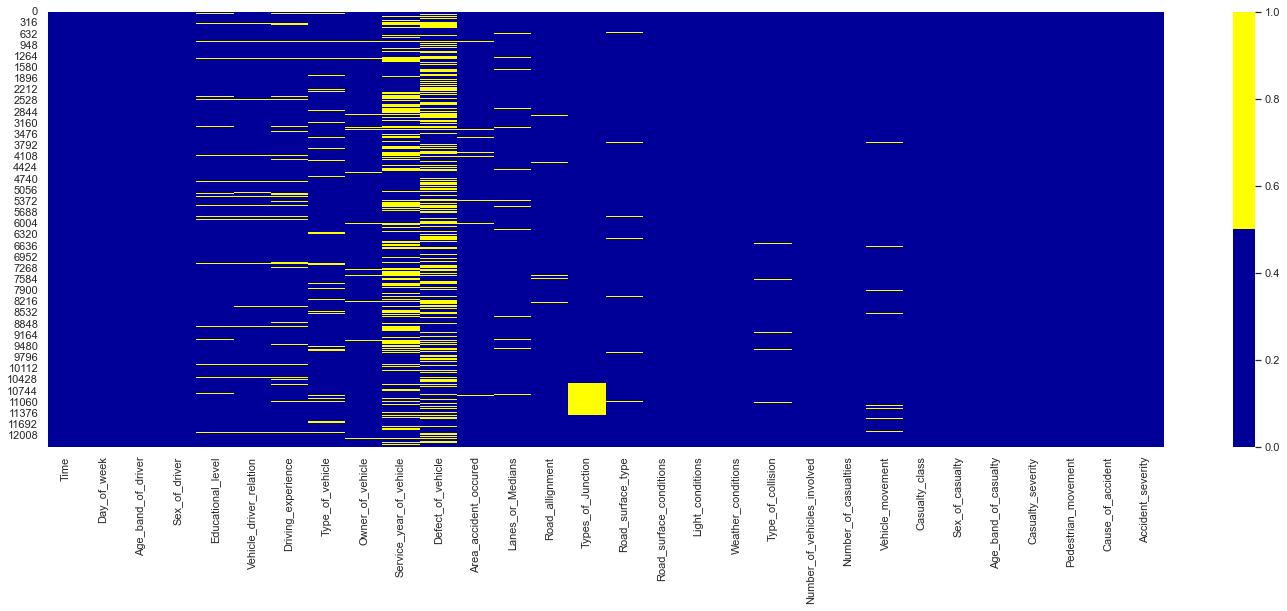

In [630]:
# check the missing data visually.colours - yellow is missing. blue is not missing.
sns.set(rc={'figure.figsize':(25,8)})

colours = ['#000099', '#ffff00'] 
sns.heatmap(df_drop[:].isnull(), cmap=sns.color_palette(colours))

In [631]:
#To remove all 'Na' rows
#df_drop.dropna(inplace=True)

In [632]:
# look at the summary 
round(100*(df_drop.isnull().sum()/len(df_drop.index)), 2)

Time                            0.00
Day_of_week                     0.00
Age_band_of_driver              0.00
Sex_of_driver                   0.00
Educational_level               6.02
Vehicle_driver_relation         4.70
Driving_experience              6.73
Type_of_vehicle                 7.71
Owner_of_vehicle                3.91
Service_year_of_vehicle        31.89
Defect_of_vehicle              35.95
Area_accident_occured           1.94
Lanes_or_Medians                3.13
Road_allignment                 1.15
Types_of_Junction               7.20
Road_surface_type               1.40
Road_surface_conditions         0.00
Light_conditions                0.00
Weather_conditions              0.00
Type_of_collision               1.26
Number_of_vehicles_involved     0.00
Number_of_casualties            0.00
Vehicle_movement                2.50
Casualty_class                  0.00
Sex_of_casualty                 0.00
Age_band_of_casualty            0.00
Casualty_severity               0.00
P

In [633]:
df_drop = df_drop.replace({"unknown": "Unknown"})
df_drop = df_drop.replace({"other": "Other"})

df_drop = df_drop.replace({'Casualty_class': {"na": "Unknown"}})
df_drop = df_drop.replace({'Sex_of_casualty': {"na": "Unknown"}})
df_drop = df_drop.replace({'Age_band_of_casualty': {"na": "Unknown"}})
df_drop = df_drop.replace({'Casualty_severity': {"na": "Unknown"}})

df_drop = df_drop.replace({'Fitness_of_casuality': {"NormalNormal": "Normal"}})


In [634]:
df_drop.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2022-03-12 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury
1,2022-03-12 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury
2,2022-03-12 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2022-03-12 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2022-03-12 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,2,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury


In [635]:
#replace Nan with unknown
df_drop['Vehicle_driver_relation'] = df_drop['Vehicle_driver_relation'].fillna("Unknown")
df_drop['Driving_experience'] = df_drop['Driving_experience'].fillna("Unknown")
df_drop['Type_of_vehicle'] = df_drop['Type_of_vehicle'].fillna("Unknown")
df_drop['Lanes_or_Medians'] = df_drop['Lanes_or_Medians'].fillna("Unknown")
df_drop['Road_allignment'] = df_drop['Road_allignment'].fillna("Unknown")
df_drop['Types_of_Junction'] = df_drop['Types_of_Junction'].fillna("Unknown")
df_drop['Lanes_or_Medians'] = df_drop['Lanes_or_Medians'].fillna("Unknown")
df_drop['Road_allignment'] = df_drop['Road_allignment'].fillna("Unknown")
df_drop['Vehicle_movement'] = df_drop['Vehicle_movement'].fillna("Unknown")
df_drop['Educational_level'] = df_drop['Educational_level'].fillna("Unknown")
df_drop['Road_surface_type'] = df_drop['Road_surface_type'].fillna("Unknown")
df_drop['Type_of_collision'] = df_drop['Type_of_collision'].fillna("Unknown")

In [636]:
#replace Nan with Other
df_drop['Owner_of_vehicle'] = df_drop['Owner_of_vehicle'].fillna("Other")
df_drop['Area_accident_occured'] = df_drop['Area_accident_occured'].fillna("Other")


In [640]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [641]:
imputer = imputer.fit(df_drop[['Service_year_of_vehicle','Defect_of_vehicle']])
df_drop[['Service_year_of_vehicle','Defect_of_vehicle']] = imputer.transform(df_drop[['Service_year_of_vehicle','Defect_of_vehicle']])


In [642]:
round(100*(df_drop.isnull().sum()/len(df_drop.index)), 2)

Time                           0.0
Day_of_week                    0.0
Age_band_of_driver             0.0
Sex_of_driver                  0.0
Educational_level              0.0
Vehicle_driver_relation        0.0
Driving_experience             0.0
Type_of_vehicle                0.0
Owner_of_vehicle               0.0
Service_year_of_vehicle        0.0
Defect_of_vehicle              0.0
Area_accident_occured          0.0
Lanes_or_Medians               0.0
Road_allignment                0.0
Types_of_Junction              0.0
Road_surface_type              0.0
Road_surface_conditions        0.0
Light_conditions               0.0
Weather_conditions             0.0
Type_of_collision              0.0
Number_of_vehicles_involved    0.0
Number_of_casualties           0.0
Vehicle_movement               0.0
Casualty_class                 0.0
Sex_of_casualty                0.0
Age_band_of_casualty           0.0
Casualty_severity              0.0
Pedestrian_movement            0.0
Cause_of_accident   

In [643]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  object        
 7   Type_of_vehicle              12316 non-null  object        
 8   Owner_of_vehicle             12316 non-null  object        
 9   Service_year_of_vehicle      12316 non-null  object        
 10  Defect_of_vehicle            12316 non-null  object        
 11  Area_accident_occured        12316 non-nu

In [644]:
df_drop['hrs'] = df_drop['Time'].dt.hour
df_drop['minute'] = df_drop['Time'].dt.minute
df_drop['sec'] = df_drop['Time'].dt.second
df_drop['Time_hrs'] = (df_drop['hrs'] * 3600 + df_drop['minute'] * 60 + df_drop['sec'])/3600

df_drop.drop(['hrs', 'minute', 'sec'], axis=1, inplace=True)

In [645]:
df_drop.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Time_hrs
0,2022-03-12 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17.033333
1,2022-03-12 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17.033333
2,2022-03-12 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17.033333
3,2022-03-12 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1.100000
4,2022-03-12 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,...,2,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1.100000


In [646]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
df_drop['Time_hrs_bin'] = pd.cut(df_drop['Time_hrs'], bins=bins, labels=labels)


In [647]:
df_drop.Time_hrs_bin = pd.to_numeric(df_drop.Time_hrs_bin, errors = 'coerce')

In [648]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  object        
 7   Type_of_vehicle              12316 non-null  object        
 8   Owner_of_vehicle             12316 non-null  object        
 9   Service_year_of_vehicle      12316 non-null  object        
 10  Defect_of_vehicle            12316 non-null  object        
 11  Area_accident_occured        12316 non-nu

In [649]:
df_drop.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Time_hrs,Time_hrs_bin
0,2022-03-12 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17.033333,18
1,2022-03-12 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17.033333,18
2,2022-03-12 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17.033333,18
3,2022-03-12 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1.100000,2
4,2022-03-12 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1.100000,2


In [650]:
Accident=df_drop.groupby("Time_hrs_bin").Accident_severity.value_counts()
Accident_severity=Accident.unstack()
Accident_severity

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Time_hrs_bin,,,
1,5.0,38.0,172.0
2,4.0,18.0,110.0
3,1.0,16.0,70.0
4,7.0,22.0,67.0
5,NaN,5.0,64.0
6,NaN,24.0,70.0
7,4.0,30.0,183.0
8,1.0,86.0,494.0
9,2.0,102.0,700.0


<Figure size 1800x576 with 0 Axes>

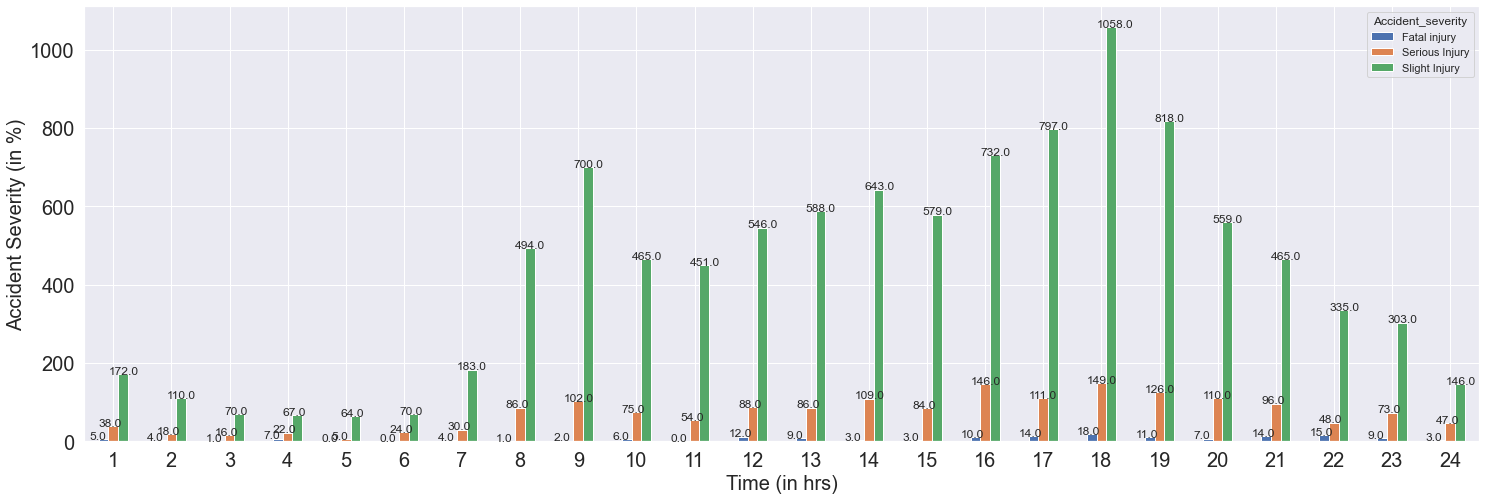

In [651]:
plt.figure(figsize = (25, 8))
ax=Accident_severity.plot(kind="bar",fontsize=20)
plt.xticks(rotation=0)
x_offset = -0.25
y_offset = 0.03

plt.xlabel('Time (in hrs)',fontsize=20)
plt.ylabel('Accident Severity (in %)',fontsize=20)

for p in ax.patches:
    b = p.get_bbox()
    val = "{:}".format(b.y1 * 1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),fontsize=12)

<ipython-input-652-3e49978dccf9>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


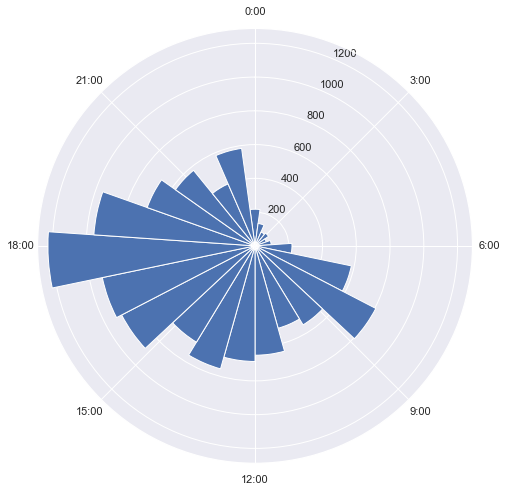

In [652]:
N = 23
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(df_drop['Time_hrs_bin'], bins = 23)

# width of each bin on the plot
width = (2*np.pi) / 23

# make a polar plot
plt.figure(figsize = (12, 8))

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)
# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)

plt.show()

## Observations:
### Most of the accidents have taken place between 5pm to 6pm
###     

In [654]:
df_drop.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Time_hrs,Time_hrs_bin
0,2022-03-12 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Moving Backward,Slight Injury,17.033333,18
1,2022-03-12 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,17.033333,18
2,2022-03-12 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17.033333,18
3,2022-03-12 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1.100000,2
4,2022-03-12 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,...,Going straight,Unknown,Unknown,Unknown,Unknown,Not a Pedestrian,Overtaking,Slight Injury,1.100000,2


In [655]:
df_drop['Sex_of_driver'] = df_drop['Sex_of_driver'].map({'Female': 0, 'Male': 1})
df_drop['Sex_of_casualty'] = df_drop['Sex_of_casualty'].map({'Female': 0, 'Male': 1})

df_drop['Age_band_of_driver'] = df_drop['Age_band_of_driver'].map({'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3})
df_drop['Age_band_of_casualty'] = df_drop['Age_band_of_casualty'].map({'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3})

df_drop['Driving_experience'] = df_drop['Driving_experience'].map({'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4, 'Above 10yr': 5})
df_drop['Educational_level'] = df_drop['Educational_level'].map({'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2, 'Junior high school': 3, 'High school': 4, 'Above high school': 5})
df_drop['Accident_severity'] = df_drop['Accident_severity'].map({'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2})
df_drop['Day_of_week'] = df_drop['Day_of_week'].map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6})
df_drop['Casualty_severity'] = df_drop['Casualty_severity'].map({'Unknown': 0})
df_drop['Service_year_of_vehicle'] = df_drop['Service_year_of_vehicle'].map({'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3, 'Above 10yr': 4, 'Unknown': 5})
df_drop['Defect_of_vehicle'] = df_drop['Defect_of_vehicle'].map({'5':5, '7':7, 'No defect': 0})

In [656]:
df_drop['Sex_of_driver'] = df_drop['Sex_of_driver'].fillna(2)
df_drop['Sex_of_casualty'] = df_drop['Sex_of_casualty'].fillna(2)
df_drop['Age_band_of_driver'] = df_drop['Age_band_of_driver'].fillna(4)
df_drop['Age_band_of_casualty'] = df_drop['Age_band_of_casualty'].fillna(4)
df_drop['Driving_experience'] = df_drop['Driving_experience'].fillna(6)
df_drop['Educational_level'] = df_drop['Educational_level'].fillna(6)
df_drop['Accident_severity'] = df_drop['Accident_severity'].fillna(3)
df_drop['Casualty_severity'] = df_drop['Casualty_severity'].fillna(0)

In [657]:
df_drop['Vehicle_driver_relation'] =  LabelEncoder().fit_transform (df_drop.Vehicle_driver_relation)
df_drop['Type_of_vehicle'] =  LabelEncoder().fit_transform (df_drop.Type_of_vehicle)
df_drop['Owner_of_vehicle'] =  LabelEncoder().fit_transform (df_drop.Owner_of_vehicle)
df_drop['Area_accident_occured'] =  LabelEncoder().fit_transform (df_drop.Area_accident_occured)
df_drop['Lanes_or_Medians'] =  LabelEncoder().fit_transform (df_drop.Lanes_or_Medians)
df_drop['Road_allignment'] =  LabelEncoder().fit_transform (df_drop.Road_allignment)
df_drop['Types_of_Junction'] =  LabelEncoder().fit_transform (df_drop.Types_of_Junction)
df_drop['Road_surface_type'] =  LabelEncoder().fit_transform (df_drop.Road_surface_type)
df_drop['Light_conditions'] =  LabelEncoder().fit_transform (df_drop.Light_conditions)
df_drop['Weather_conditions'] =  LabelEncoder().fit_transform (df_drop.Weather_conditions)
df_drop['Type_of_collision'] =  LabelEncoder().fit_transform (df_drop.Type_of_collision)
df_drop['Vehicle_movement'] =  LabelEncoder().fit_transform (df_drop.Vehicle_movement)
df_drop['Casualty_class'] =  LabelEncoder().fit_transform (df_drop.Casualty_class)
df_drop['Pedestrian_movement'] =  LabelEncoder().fit_transform (df_drop.Pedestrian_movement)
df_drop['Cause_of_accident'] =  LabelEncoder().fit_transform (df_drop.Cause_of_accident)
df_drop['Road_surface_conditions'] =  LabelEncoder().fit_transform (df_drop.Road_surface_conditions)

In [660]:
df_drop.to_csv ('./df_drop_cleaned_data_v2.csv', index = False, header=True)

In [661]:
round(100*(df_drop.isnull().sum()/len(df_drop.index)), 2)

Time                           0.0
Day_of_week                    0.0
Age_band_of_driver             0.0
Sex_of_driver                  0.0
Educational_level              0.0
Vehicle_driver_relation        0.0
Driving_experience             0.0
Type_of_vehicle                0.0
Owner_of_vehicle               0.0
Service_year_of_vehicle        0.0
Defect_of_vehicle              0.0
Area_accident_occured          0.0
Lanes_or_Medians               0.0
Road_allignment                0.0
Types_of_Junction              0.0
Road_surface_type              0.0
Road_surface_conditions        0.0
Light_conditions               0.0
Weather_conditions             0.0
Type_of_collision              0.0
Number_of_vehicles_involved    0.0
Number_of_casualties           0.0
Vehicle_movement               0.0
Casualty_class                 0.0
Sex_of_casualty                0.0
Age_band_of_casualty           0.0
Casualty_severity              0.0
Pedestrian_movement            0.0
Cause_of_accident   

In [662]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  int64         
 2   Age_band_of_driver           12316 non-null  float64       
 3   Sex_of_driver                12316 non-null  float64       
 4   Educational_level            12316 non-null  float64       
 5   Vehicle_driver_relation      12316 non-null  int32         
 6   Driving_experience           12316 non-null  float64       
 7   Type_of_vehicle              12316 non-null  int32         
 8   Owner_of_vehicle             12316 non-null  int32         
 9   Service_year_of_vehicle      12316 non-null  int64         
 10  Defect_of_vehicle            12316 non-null  int64         
 11  Area_accident_occured        12316 non-nu

<AxesSubplot:>

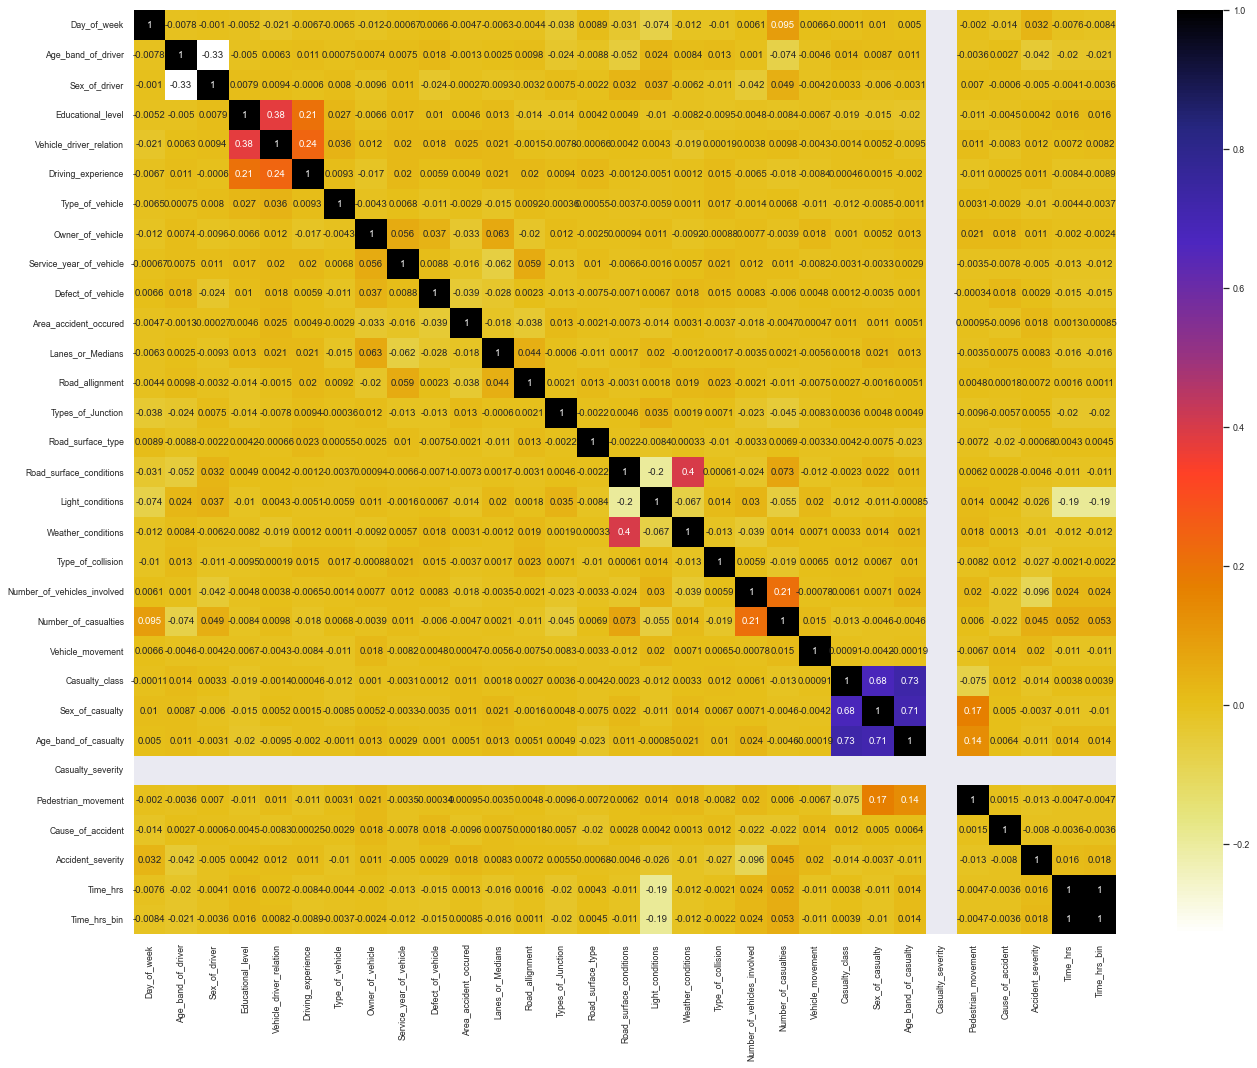

In [663]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df_drop.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [664]:
X = df_drop.drop(columns=['Accident_severity', 'Time', 'Time_hrs'])
y = df_drop['Accident_severity']

In [665]:
X.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Time_hrs_bin
0,0,1.0,1.0,5.0,0,2.0,0,3,4,0,...,2,2,2,3,2.0,4.0,0.0,5,9,18
1,0,2.0,1.0,3.0,0,5.0,11,3,3,0,...,2,2,2,3,2.0,4.0,0.0,5,16,18
2,0,1.0,1.0,3.0,0,2.0,5,3,5,0,...,2,2,2,0,1.0,2.0,0.0,5,0,18
3,6,1.0,1.0,3.0,0,4.0,11,0,5,0,...,2,2,2,2,0.0,1.0,0.0,5,1,2
4,6,1.0,1.0,3.0,0,3.0,17,3,3,0,...,2,2,2,3,2.0,4.0,0.0,5,16,2


In [666]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=42)

In [667]:
print("counts of Slight Injury (0) :",sum(y_train == 0))
print("counts of Serious Injury (1) :",sum(y_train == 1))
print("counts of Fatal Injury (2) :",sum(y_train == 2))

counts of Slight Injury (0) : 7324
counts of Serious Injury (1) : 1191
counts of Fatal Injury (2) : 106


In [668]:
X_train.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Time_hrs_bin
4759,2,2.0,1.0,4.0,0,2.0,0,3,5,0,...,2,1,1,2,0.0,2.0,0.0,5,0,8
5676,2,2.0,1.0,2.0,0,1.0,14,3,4,0,...,2,1,2,0,1.0,1.0,0.0,5,16,7
353,6,4.0,0.0,3.0,0,2.0,7,3,5,0,...,2,1,2,0,1.0,1.0,0.0,5,3,6
6223,5,2.0,1.0,3.0,0,4.0,9,3,4,0,...,2,1,2,0,1.0,1.0,0.0,5,1,5
456,1,0.0,1.0,4.0,0,3.0,0,1,3,0,...,4,6,2,0,1.0,2.0,0.0,5,12,12


In [669]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [670]:
X_train_smote.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Time_hrs_bin
0,2,2.0,1.0,4.0,0,2.0,0,3,5,0,...,2,1,1,2,0.0,2.0,0.0,5,0,8
1,2,2.0,1.0,2.0,0,1.0,14,3,4,0,...,2,1,2,0,1.0,1.0,0.0,5,16,7
2,6,4.0,0.0,3.0,0,2.0,7,3,5,0,...,2,1,2,0,1.0,1.0,0.0,5,3,6
3,5,2.0,1.0,3.0,0,4.0,9,3,4,0,...,2,1,2,0,1.0,1.0,0.0,5,1,5
4,1,0.0,1.0,4.0,0,3.0,0,1,3,0,...,4,6,2,0,1.0,2.0,0.0,5,12,12


In [671]:
print("counts of Slight Injury (0) :",sum(y_train_smote == 0))
print("counts of Serious Injury (1) :",sum(y_train_smote == 1))
print("counts of Fatal Injury (2) :",sum(y_train_smote == 2))

counts of Slight Injury (0) : 7324
counts of Serious Injury (1) : 7324
counts of Fatal Injury (2) : 7324


In [672]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    conf_met = []
    models = []
    if 'lr' in kwargs.keys() and kwargs['lr']:
        lr =  LogisticRegression(max_iter=1000)
        lr.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = lr.predict(X_test._get_numeric_data())
        conf_met.append(accuracy_score(y_test, y_pred))
        conf_met.append(precision_score(y_test, y_pred, average= 'weighted'))
        conf_met.append(recall_score(y_test, y_pred, average= 'weighted'))
        conf_met.append(f1_score(y_test, y_pred, average= 'weighted'))
        models.append('lr')
    
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        conf_met.append(accuracy_score(y_test, y_pred))
        conf_met.append(precision_score(y_test, y_pred, average= 'weighted'))
        conf_met.append(recall_score(y_test, y_pred, average= 'weighted'))
        conf_met.append(f1_score(y_test, y_pred, average= 'weighted'))
        models.append('xgb')
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        conf_met.append(accuracy_score(y_test, y_pred))
        conf_met.append(precision_score(y_test, y_pred, average= 'weighted'))
        conf_met.append(recall_score(y_test, y_pred, average= 'weighted'))
        conf_met.append(f1_score(y_test, y_pred, average= 'weighted'))
        models.append('rf')

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        conf_met.append(accuracy_score(y_test, y_pred))
        conf_met.append(precision_score(y_test, y_pred, average= 'weighted'))
        conf_met.append(recall_score(y_test, y_pred, average= 'weighted'))
        conf_met.append(f1_score(y_test, y_pred, average= 'weighted'))
        models.append('extree')
        
    return models, conf_met

In [673]:
models, conf_met = modelling(X_train_smote,y_train_smote, X_test, y_test, lr = True, xgb=True, rf=True, extree=True)


In [674]:
j=4
for i in range(int(len(conf_met)/4)):
    print("Eval Matrics for model : ", models[i])
    print("   Accuracy   =", conf_met[i*j])
    print("   Precesion  =", conf_met[(i*j+1)])
    print("   Recall     =", conf_met[(i*j+2)])
    print("   f1_score   =", conf_met[(i*j+3)])
   

Eval Matrics for model :  lr
   Accuracy   = 0.5196211096075778
   Precesion  = 0.746025286375695
   Recall     = 0.5196211096075778
   f1_score   = 0.6020038518344167
Eval Matrics for model :  xgb
   Accuracy   = 0.8373477672530446
   Precesion  = 0.7836701499682072
   Recall     = 0.8373477672530446
   f1_score   = 0.7820725915701955
Eval Matrics for model :  rf
   Accuracy   = 0.8243572395128552
   Precesion  = 0.7560951767057992
   Recall     = 0.8243572395128552
   f1_score   = 0.7755763962188786
Eval Matrics for model :  extree
   Accuracy   = 0.8254397834912043
   Precesion  = 0.7607297518153097
   Recall     = 0.8254397834912043
   f1_score   = 0.7763092531009353


In [675]:
xgb = XGBClassifier()
xgb.fit(X_train_smote, y_train_smote)
y_pred = xgb.predict(X_test)
xgb.get_params()

{'objective': 'multi:softprob',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [676]:
folds = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train_smote, y=y_train_smote)
#folds = 3

# A parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.2, 0.3, 0.4 ], 
    'subsample': [ 0.8, 0.9, 1.0]
} 


# specify model
xgb_model = XGBClassifier(max_depth=6, n_estimators=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'f1_weighted', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs = -1) 


# fit the model
xgb_model_cv = model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [677]:
(model_cv.best_params_, model_cv.best_score_)

({'learning_rate': 0.4, 'subsample': 0.9}, 0.9417896554925856)

In [678]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,12.011474,0.076532,0.201854,0.001702,0.2,0.8,"{'learning_rate': 0.2, 'subsample': 0.8}",0.939843,0.935656,0.940377,0.938625,0.002111,7,0.974936,0.974083,0.974449,0.974489,0.000349
1,12.095215,0.476732,0.179109,0.013826,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.937688,0.934936,0.939209,0.937278,0.001769,8,0.972184,0.973457,0.975403,0.973681,0.001324
2,11.676764,0.839075,0.164153,0.016077,0.2,1,"{'learning_rate': 0.2, 'subsample': 1.0}",0.937010,0.935487,0.936441,0.936313,0.000629,9,0.971495,0.969550,0.971564,0.970870,0.000934
3,12.766116,0.457868,0.173966,0.018246,0.3,0.8,"{'learning_rate': 0.3, 'subsample': 0.8}",0.940778,0.936714,0.940988,0.939494,0.001967,5,0.988396,0.989278,0.989349,0.989008,0.000434
4,12.482854,0.661050,0.189509,0.025061,0.3,0.9,"{'learning_rate': 0.3, 'subsample': 0.9}",0.941481,0.938618,0.943794,0.941298,0.002117,2,0.988053,0.987773,0.988668,0.988165,0.000374
5,12.312635,0.856579,0.164820,0.011908,0.3,1,"{'learning_rate': 0.3, 'subsample': 1.0}",0.938324,0.938605,0.939284,0.938738,0.000403,6,0.983612,0.985994,0.984564,0.984723,0.000979
6,12.968914,0.592084,0.173494,0.016555,0.4,0.8,"{'learning_rate': 0.4, 'subsample': 0.8}",0.942858,0.938458,0.939540,0.940286,0.001872,3,0.996109,0.995630,0.996382,0.996040,0.000311
7,12.849802,0.586990,0.177498,0.022669,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.942545,0.941721,0.941103,0.941790,0.000591,1,0.995699,0.996586,0.996450,0.996245,0.000390
8,5.731481,0.032801,0.137461,0.003094,0.4,1,"{'learning_rate': 0.4, 'subsample': 1.0}",0.939351,0.938324,0.942469,0.940048,0.001762,4,0.993173,0.993513,0.992217,0.992968,0.000549


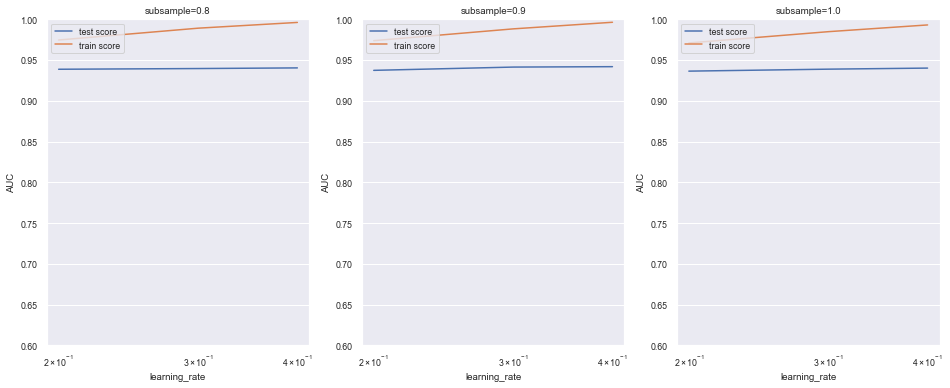

In [679]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {
    'learning_rate': [0.2, 0.3, 0.4 ], 
    'subsample': [ 0.8, 0.9, 1.0]
} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

### The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal

In [680]:
# params = {'learning_rate': 0.2,
#           'n_estimators':100,
#           'subsample':0.9}
# fit model on training data
model_XGBC_tuned = XGBClassifier(max_depth=6, n_estimators=100,learning_rate = 0.3, subsample = 0.8)
model_XGBC_tuned.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [681]:

y_pred = model_XGBC_tuned.predict(X_test)
print( "Accuracy = ", accuracy_score(y_test, y_pred))
print( "Precision = ", precision_score(y_test, y_pred, average= 'weighted'))
print( "Recall = ", recall_score(y_test, y_pred, average= 'weighted'))
print( "F1 score = ", f1_score(y_test, y_pred, average= 'weighted'))

Accuracy =  0.835723951285521
Precision =  0.7842657734687505
Recall =  0.835723951285521
F1 score =  0.7820589789735519


In [682]:
folds = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train_smote, y=y_train_smote)
#folds = 3

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}


# specify model
extree_estimator = ExtraTreesClassifier()

# set up GridSearchCV()
gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=folds,
    verbose=3,
)



# fit the model
extree_model = gsearch.fit(X=X_train_smote, y=y_train_smote)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.8687183827539342)

In [683]:
folds = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train_smote, y=y_train_smote)
#folds = 3

# A parameter grid for XGBoost
params2 = {
    'n_estimators': range(100, 400, 100),
    'max_depth': [18,19,20],
}


# specify model
extree_estimator1 = ExtraTreesClassifier(min_samples_split=2, class_weight = 'balanced')

# set up GridSearchCV()
gsearch1 = GridSearchCV(
    estimator= extree_estimator1,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=folds,
    verbose=3,
)

# fit the model
extree_model1 = gsearch1.fit(X=X_train_smote, y=y_train_smote)
(gsearch1.best_params_, gsearch1.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


({'max_depth': 20, 'n_estimators': 300}, 0.9507239868183625)

In [684]:
extree_model1.get_params()

{'cv': <generator object _BaseKFold.split at 0x00000216032BC970>,
 'error_score': nan,
 'estimator__bootstrap': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesClassifier(class_weight='balanced'),
 'n_jobs': -1,
 'param_grid': {'n_estimators': range(100, 400, 100),
  'max_depth': [18, 19, 20]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'f1_weighted',
 'verbose': 3}

In [685]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 20,
                                n_estimators = 300)

extree_tuned.fit(X_train_smote, y_train_smote)
y_pred_tuned = extree_tuned.predict(X_test)

In [686]:
Accuracy  =  accuracy_score(y_test, y_pred_tuned)
Precision =  precision_score(y_test, y_pred_tuned, average= 'weighted')
Recall    =  recall_score(y_test, y_pred_tuned, average= 'weighted')
F1_score  =  f1_score(y_test, y_pred_tuned, average= 'weighted')
Accuracy, Precision, Recall, F1_score

(0.8167794316644114, 0.75297852092217, 0.8167794316644114, 0.7741953748981422)

In [687]:
# feature importance
importance = dict(zip(X_train.columns, model_XGBC_tuned.feature_importances_))
importance

{'Day_of_week': 0.021681923,
 'Age_band_of_driver': 0.06212518,
 'Sex_of_driver': 0.05578896,
 'Educational_level': 0.05392408,
 'Vehicle_driver_relation': 0.028275978,
 'Driving_experience': 0.05662875,
 'Type_of_vehicle': 0.02099992,
 'Owner_of_vehicle': 0.017044703,
 'Service_year_of_vehicle': 0.023168162,
 'Defect_of_vehicle': 0.01454097,
 'Area_accident_occured': 0.013418356,
 'Lanes_or_Medians': 0.020781334,
 'Road_allignment': 0.016572043,
 'Types_of_Junction': 0.027173268,
 'Road_surface_type': 0.020983156,
 'Road_surface_conditions': 0.06299803,
 'Light_conditions': 0.06918053,
 'Weather_conditions': 0.021053141,
 'Type_of_collision': 0.02436337,
 'Number_of_vehicles_involved': 0.074111916,
 'Number_of_casualties': 0.052958608,
 'Vehicle_movement': 0.017173938,
 'Casualty_class': 0.035792317,
 'Sex_of_casualty': 0.08596317,
 'Age_band_of_casualty': 0.041720744,
 'Casualty_severity': 0.0,
 'Pedestrian_movement': 0.0141044,
 'Cause_of_accident': 0.025633534,
 'Time_hrs_bin': 0.0

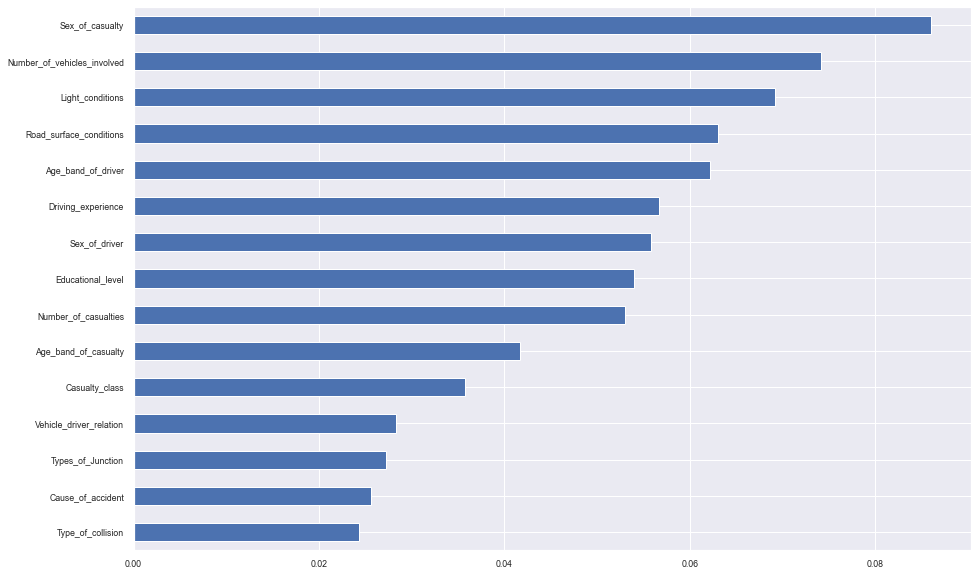

In [691]:
plt.figure(figsize=(15,10))
features_imp = pd.Series(model_XGBC_tuned.feature_importances_, index=X_train.columns)
features_imp.nlargest((15)).sort_values().plot(kind='barh', align='center')
plt.show()

In [692]:
features_imp =features_imp.nlargest((15)).sort_values(ascending=False)
features_imp

Sex_of_casualty                0.085963
Number_of_vehicles_involved    0.074112
Light_conditions               0.069181
Road_surface_conditions        0.062998
Age_band_of_driver             0.062125
Driving_experience             0.056629
Sex_of_driver                  0.055789
Educational_level              0.053924
Number_of_casualties           0.052959
Age_band_of_casualty           0.041721
Casualty_class                 0.035792
Vehicle_driver_relation        0.028276
Types_of_Junction              0.027173
Cause_of_accident              0.025634
Type_of_collision              0.024363
dtype: float32